# Activity_unsupervised learning

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

How will you help this NGO to make a correct decision based on socio-economic and health factors?


In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
#Data Loading
data=pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.shape

(167, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


**Inference**
- There are 167 records and 10 variables including the country name.
- All are numerical variables except for country name.

In [7]:
# Calculating the Missing Values
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**Inference**
- None of the columns have null values

In [8]:
#checking for duplicates
data.duplicated(subset = ['country'], keep = False).sum()

0

**There are no duplicate records in the dataset.**

### Outlier Analysis

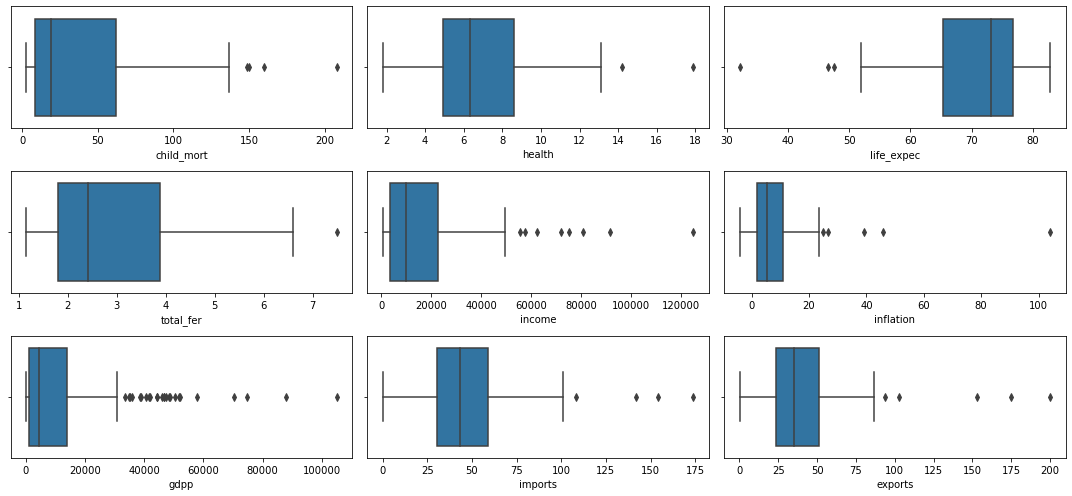

In [9]:
fig, axs = plt.subplots(3,3, figsize = (15,7))
plt1 = sns.boxplot(data['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data['health'], ax = axs[0,1])
plt3 = sns.boxplot(data['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data['income'], ax = axs[1,1])
plt6 = sns.boxplot(data['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data['exports'], ax = axs[2,2])


plt.tight_layout()

**There are very few outliers (<= 5) for all variables except for income and gdpp.**

In [10]:
# Before manipulating data, we will save one copy of orignal data.
data_help = data.copy()
data_help.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Handling Outliers

In [11]:
cols = data.columns.to_list()
cols.remove('country')
for i in cols:
    Q1=np.percentile(data[i],25,interpolation='midpoint')
    Q2=np.percentile(data[i],50,interpolation='midpoint')
    Q3=np.percentile(data[i],75,interpolation='midpoint')
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    data.loc[data[i]<lower_limit, i] = lower_limit
    data.loc[data[i]>upper_limit, i] = upper_limit

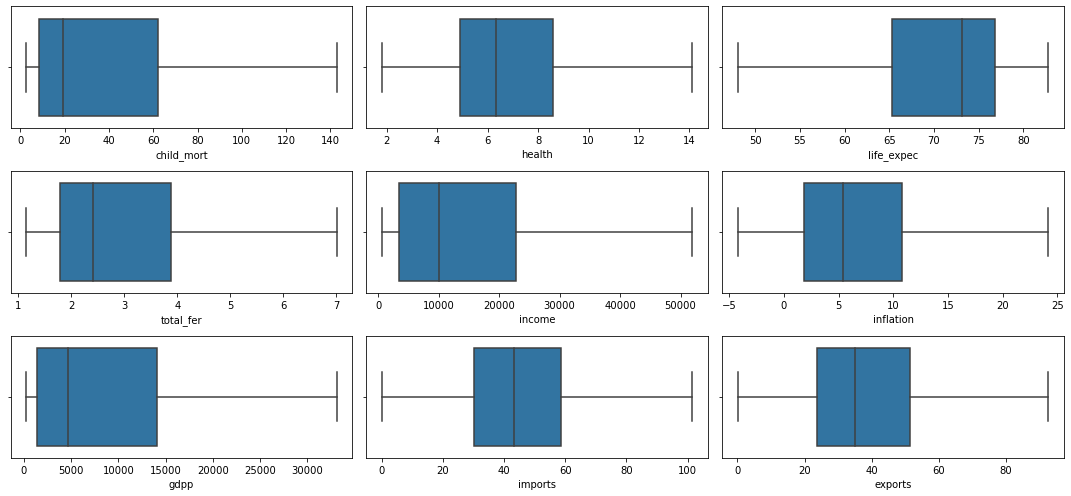

In [12]:
fig, axs = plt.subplots(3,3, figsize = (15,7))
plt1 = sns.boxplot(data['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data['health'], ax = axs[0,1])
plt3 = sns.boxplot(data['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data['income'], ax = axs[1,1])
plt6 = sns.boxplot(data['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data['exports'], ax = axs[2,2])


plt.tight_layout()

In [13]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.698204,39.543557,6.792575,45.862071,15921.574850,7.065066,70.663772,2.945075,10351.281437
std,38.443293,21.301318,2.668103,20.338815,15207.197459,6.704968,8.522535,1.505564,11612.044330
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,48.050000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,142.875000,92.675000,14.120000,101.575000,51967.500000,24.160000,82.800000,7.007500,33130.000000


### Visualising the Data:

<Figure size 288x288 with 0 Axes>

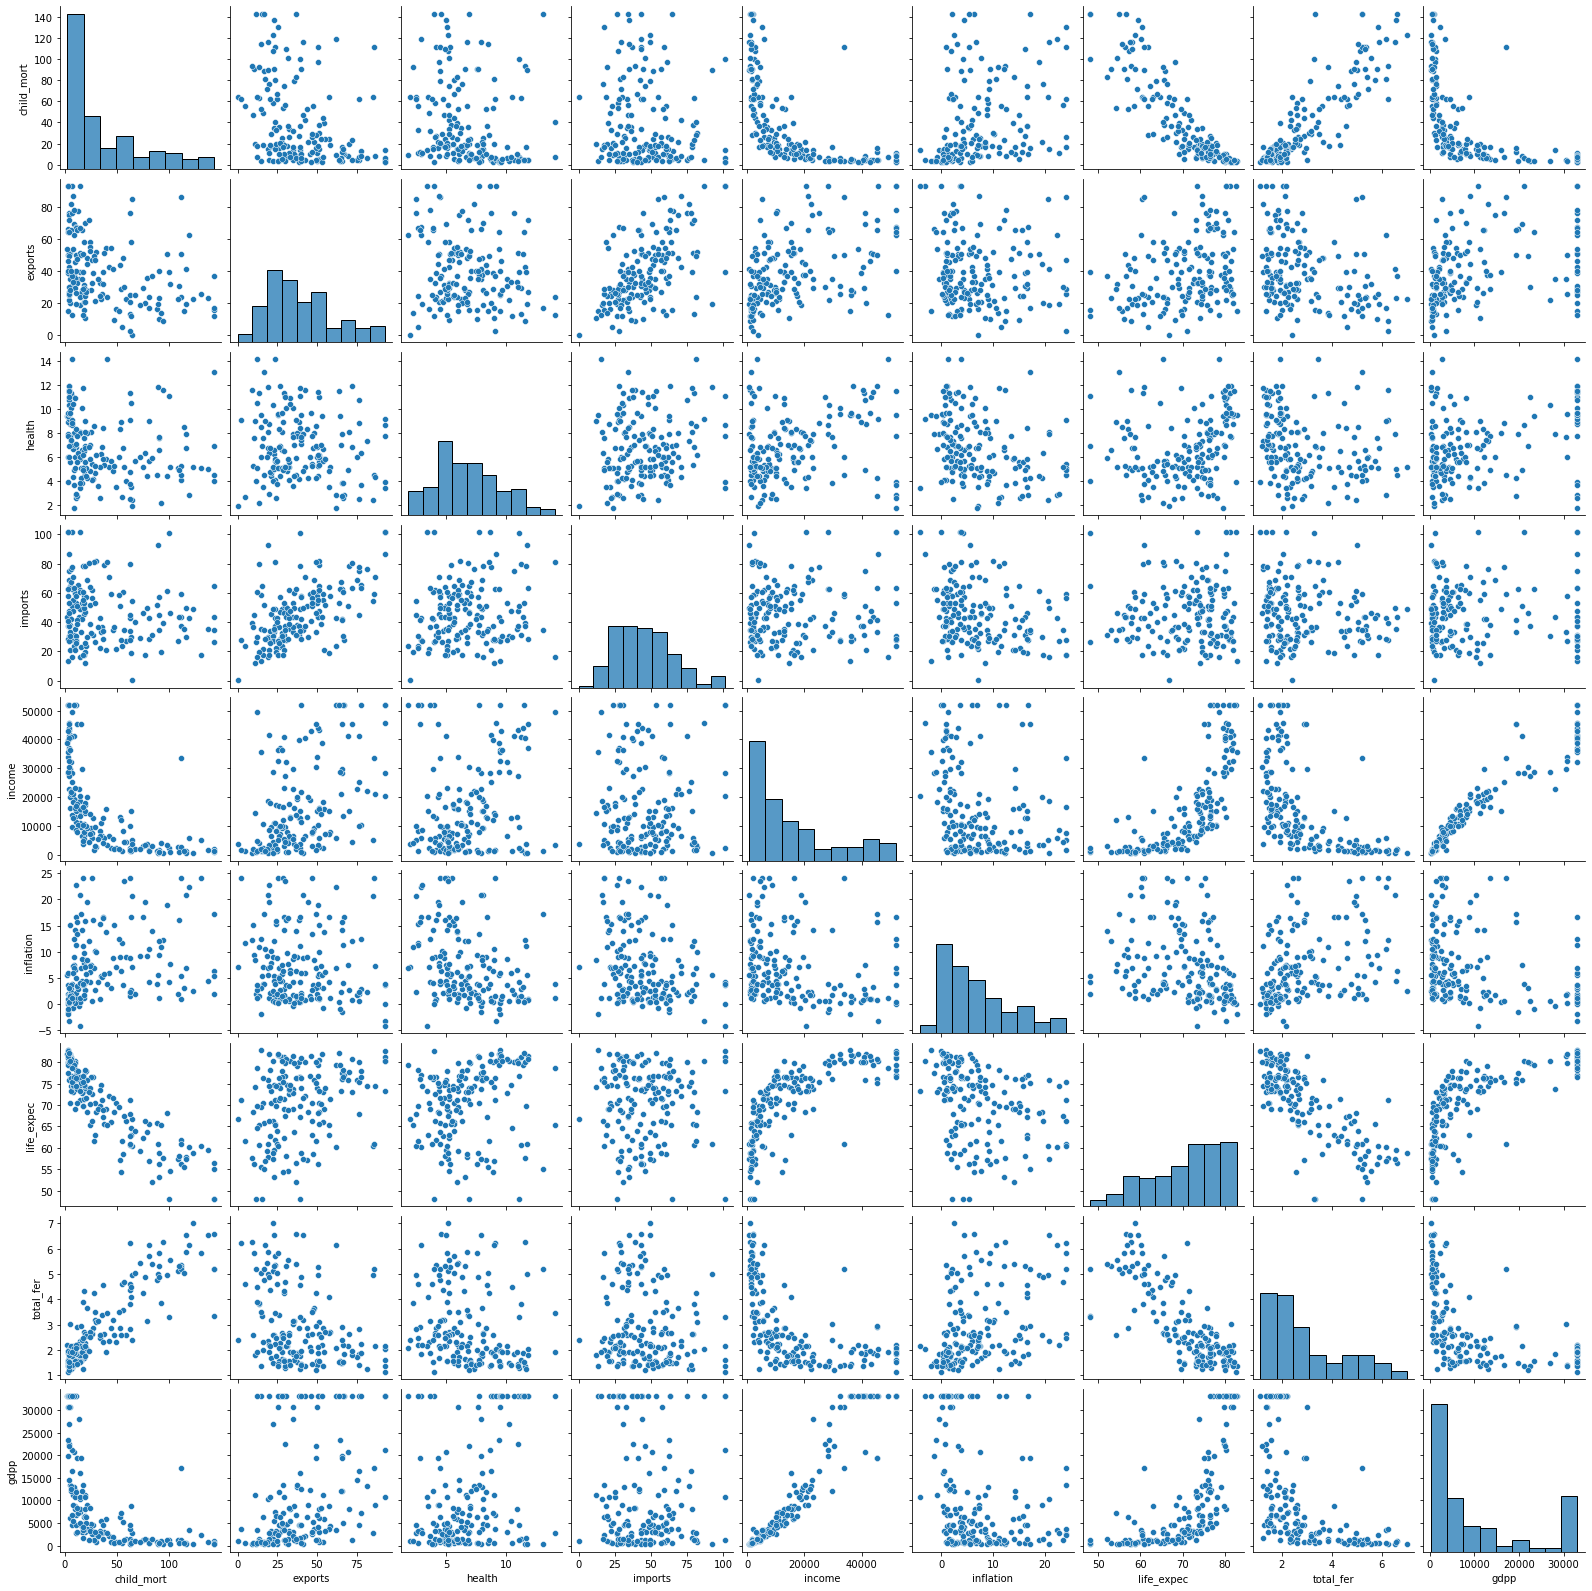

In [14]:
#pairplot of numerical variables
plt.figure(figsize = (4,4))
sns.pairplot(data)
plt.show()

**Findings**

- Linear relation is found between gdpp-income,imports-exports,total_fer-child_mort
- Rectangular hyperbola curve is generated by gdpp-child_mort.
- If gdpp is HIGH:
  - child mortality is LOW
  - income is HIGH
  - inflation is LOW
  - life expectancy is HIGH
  - total fertility is LOW
  - health, imports and exports are MEDIUM

<AxesSubplot:>

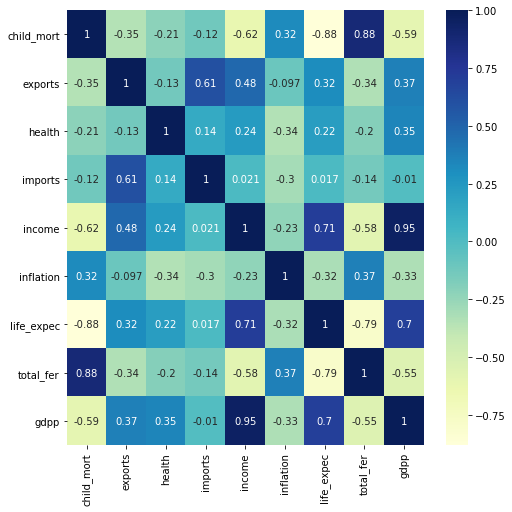

In [16]:
# Let us draw heatmap to understand the corelation better.
plt.figure(figsize = (8,8))  
sns.heatmap(data.corr(),annot = True,cmap="YlGnBu")

We observe the following correlations from the plot.

- gdpp and income are most highly correlated with correlation of 0.93
- child_mortality and life_expentency are highly correlated with correlation of -0.88
- child_mortality and total_fertility are highly correlated with correlation of 0.84
- life_expentency and total_fertility are highly correlated with correlation of -0.75

### Modeling

#### Scaling the data

In [17]:
data_sc=data.drop('country', axis=1)
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
data_sc = standard_scaler.fit_transform(data_sc)

### PCA

In [18]:
from sklearn.decomposition import PCA
pca = PCA().fit(data_sc)

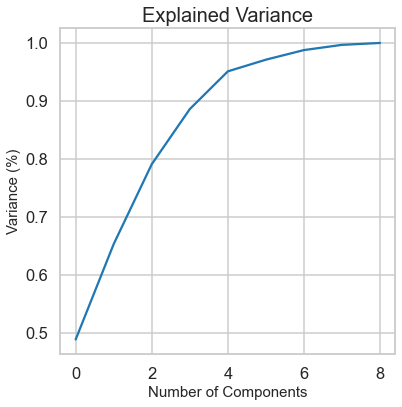

In [19]:
plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")

# plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# define the labels & title
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)

# show the plot
plt.show()

From the graph we use 6 components

In [20]:
data_pca = PCA(n_components=6).fit(data_sc).transform(data_sc)

# store it in a new data frame
data_pca= pd.DataFrame(data = data_pca, columns = ['PC 1', 'PC 2',
                                                        'PC 3','PC4',
                                                        'PC 5','PC6'])

data_pca.head()

,PC 1,PC 2,PC 3,PC4,PC 5,PC6
0,-3.177917,-0.251292,-1.011474,0.778804,-0.014102,-0.249887
1,0.434979,-0.218700,-0.292591,-1.391241,0.156711,-0.095015
2,-0.416784,-0.613870,1.637859,-0.615021,0.536604,-0.429119
3,-3.306409,1.066649,2.151219,1.698677,0.160551,-0.318015
4,1.253246,0.547778,-0.136955,-0.716890,-0.394628,-0.311152


### K-mean clustering

Text(0, 0.5, 'Inertia')

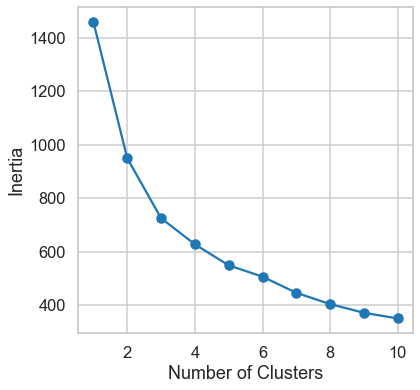

In [21]:
from sklearn.cluster import KMeans
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(data_pca)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [22]:
# We can use 3 clusters as seen from the elbow graph
kmeans = KMeans(n_clusters=3,random_state=42,init="k-means++")
y_kmeans = kmeans.fit_predict(data_pca)

In [23]:
data['cluster'] = y_kmeans

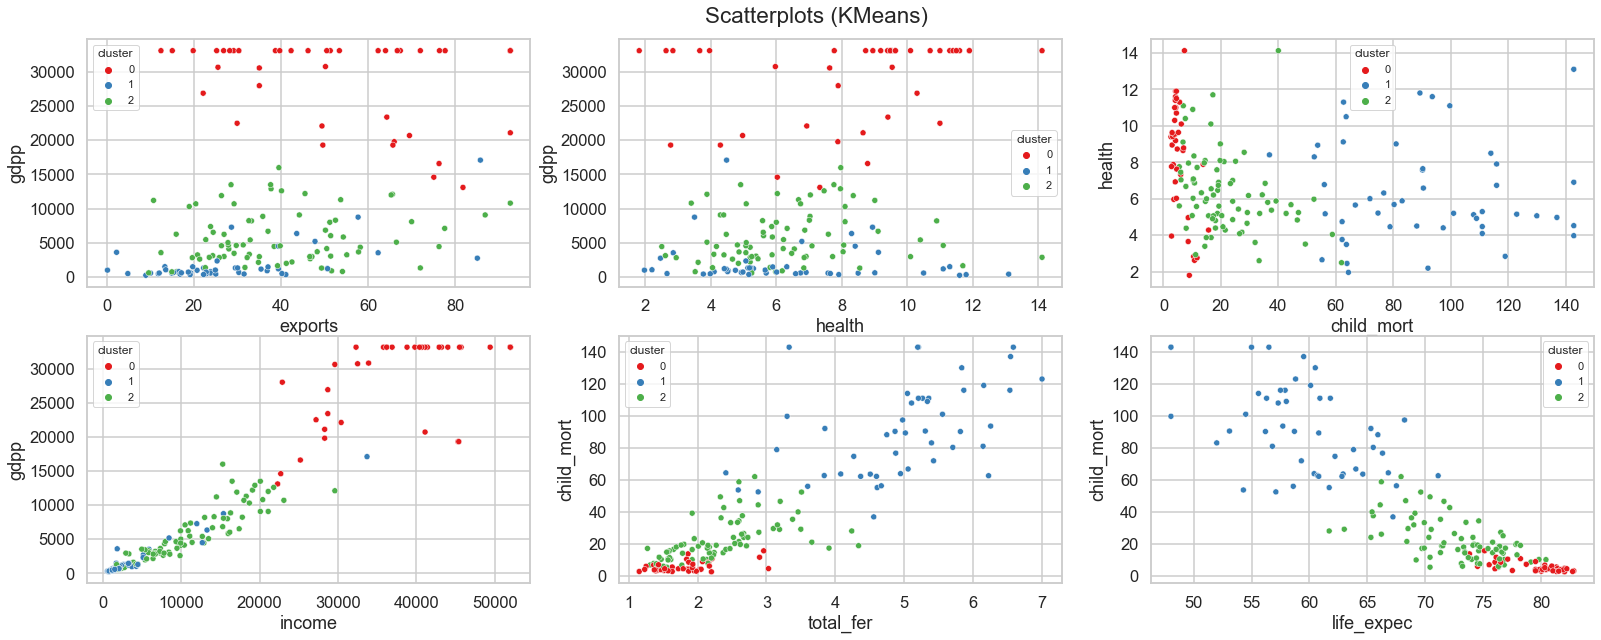

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(27, 10))
fig.suptitle('Scatterplots (KMeans)', fontsize=22.5, y=0.925)
sns.set_theme(style="whitegrid", palette="muted")
sns.scatterplot(ax=axes[0,0], x = 'exports', y = 'gdpp', hue ='cluster', legend = 'full', data = data, palette='Set1')
sns.scatterplot(ax=axes[0,1], x = 'health', y = 'gdpp', hue ='cluster', legend = 'full', data = data, palette='Set1')
sns.scatterplot(ax=axes[0,2], x = 'child_mort', y = 'health', hue ='cluster', legend = 'full', data = data, palette='Set1')
sns.scatterplot(ax=axes[1,0], x = 'income', y = 'gdpp', hue ='cluster', legend = 'full', data = data, palette='Set1')
sns.scatterplot(ax=axes[1,1], x = 'total_fer', y = 'child_mort', hue ='cluster', legend = 'full', data = data, palette='Set1')
sns.scatterplot(ax=axes[1,2], x = 'life_expec', y = 'child_mort', hue ='cluster', legend = 'full', data = data, palette='Set1')
plt.show()

In [25]:
# Cluster 0 - Developed countries
data[data['cluster'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
7,Australia,4.8,19.800,8.73,20.900,41400.0,1.160,82.0,1.93,33130.0,0
8,Austria,4.3,51.300,11.00,47.800,43200.0,0.873,80.5,1.44,33130.0,0
10,Bahamas,13.8,35.000,7.89,43.700,22900.0,-0.393,73.8,1.86,28000.0,0
11,Bahrain,8.6,69.500,4.97,50.900,41100.0,7.440,76.0,2.16,20700.0,0
15,Belgium,4.5,76.400,10.70,74.700,41100.0,1.880,80.0,1.86,33130.0,0
23,Brunei,10.5,67.400,2.84,28.000,51967.5,16.700,77.1,1.84,33130.0,0
29,Canada,5.6,29.100,11.30,31.000,40700.0,2.870,81.3,1.63,33130.0,0
42,Cyprus,3.6,50.200,5.97,57.500,33900.0,2.010,79.9,1.42,30800.0,0
43,Czech Republic,3.4,66.000,7.88,62.900,28300.0,-1.430,77.5,1.51,19800.0,0
44,Denmark,4.1,50.500,11.40,43.600,44000.0,3.220,79.5,1.87,33130.0,0


In [56]:
# Cluster 1 - Developing countries - May need funds to maintain the progress
data[data['cluster'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,hier_clus
0,Afghanistan,90.200,10.000,7.58,44.9000,1610.0,9.440,56.20,5.8200,553.0,1,1
3,Angola,119.000,62.300,2.85,42.9000,5900.0,22.400,60.10,6.1600,3530.0,1,1
17,Benin,111.000,23.800,4.10,37.2000,1820.0,0.885,61.80,5.3600,758.0,1,1
21,Botswana,52.500,43.600,8.30,51.3000,13300.0,8.920,57.10,2.8800,6350.0,1,0
25,Burkina Faso,116.000,19.200,6.74,29.6000,1430.0,6.810,57.90,5.8700,575.0,1,1
26,Burundi,93.600,8.920,11.60,39.2000,764.0,12.300,57.70,6.2600,231.0,1,1
28,Cameroon,108.000,22.200,5.13,27.0000,2660.0,1.910,57.30,5.1100,1310.0,1,1
31,Central African Republic,142.875,11.800,3.98,26.5000,888.0,2.010,48.05,5.2100,446.0,1,1
32,Chad,142.875,36.800,4.53,43.5000,1930.0,6.390,56.50,6.5900,897.0,1,1
36,Comoros,88.200,16.500,4.51,51.7000,1410.0,3.870,65.90,4.7500,769.0,1,1


In [57]:
# Cluster 2- Under-developed - Needs funds immediately
data[data['cluster'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,hier_clus
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,2,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,2,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,2,0
5,Argentina,14.5,18.9,8.10,16.0,18700.0,20.90,75.8,2.37,10300.0,2,0
6,Armenia,18.1,20.8,4.40,45.3,6700.0,7.77,73.3,1.69,3220.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100.0,4.91,76.4,2.08,11900.0,2,0
161,Uzbekistan,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.34,1380.0,2,0
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,2,0
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500.0,2,0


## Hierarchical Agglomerative Clustering

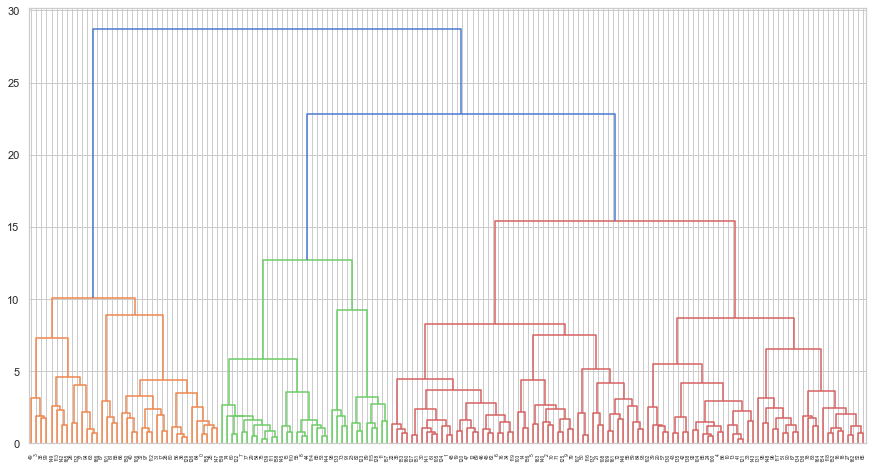

In [30]:
# Checking the dendrogram 
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,8))
dendrogram=sch.dendrogram(sch.linkage(data_pca,method='ward'),orientation="top",distance_sort='ascending',show_leaf_counts=True)
plt.show()

In [40]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data_pca)
y_hc

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1,
       1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2, 1, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [41]:
data['hier_clus']=y_hc


In [42]:
# Checking the grouping obtained based on K means clustering
data.drop('hier_clus',axis=1).groupby(['cluster','country']).mean()

child_mort  exports  health  imports   income  inflation  \
cluster country                                                                
0       Australia          4.8     19.8    8.73     20.9  41400.0      1.160   
        Austria            4.3     51.3   11.00     47.8  43200.0      0.873   
        Bahamas           13.8     35.0    7.89     43.7  22900.0     -0.393   
        Bahrain            8.6     69.5    4.97     50.9  41100.0      7.440   
        Belgium            4.5     76.4   10.70     74.7  41100.0      1.880   
...                        ...      ...     ...      ...      ...        ...   
2       Uruguay           10.6     26.3    8.35     25.4  17100.0      4.910   
        Uzbekistan        36.3     31.7    5.81     28.5   4240.0     16.500   
        Vanuatu           29.2     46.6    5.25     52.7   2950.0      2.620   
        Venezuela         17.1     28.5    4.91     17.6  16500.0     24.160   
        Vietnam           23.3     72.0    6.84     80.2   4490.0     12.100   

                    life_expec  total_fer     gdpp  
cluster country                                     
0       Australia         82.0       1.93  33130.0  
        Austria           80.5       1.44  33130.0  
        Bahamas           73.8       1.86  28000.0  
        Bahrain           76.0       2.16  20700.0  
        Belgium           80.0       1.86  33130.0  
...                        ...        ...      ...  
2       Uruguay           76.4       2.08  11900.0  
        Uzbekistan        68.8       2.34   1380.0  
        Vanuatu           63.0       3.50   2970.0  
        Venezuela         75.4       2.47  13500.0  
        Vietnam           73.1       1.95   1310.0  

[167 rows x 9 columns]

In [43]:
# Grouping by hierarchial cluster label
data.drop('cluster',axis=1).groupby(['hier_clus','country']).mean()

child_mort  exports  health  imports   income  \
hier_clus country                                                               
0         Albania                     16.6     28.0    6.55     48.6   9930.0   
          Algeria                     27.3     38.4    4.17     31.4  12900.0   
          Antigua and Barbuda         10.3     45.5    6.03     58.9  19100.0   
          Argentina                   14.5     18.9    8.10     16.0  18700.0   
          Armenia                     18.1     20.8    4.40     45.3   6700.0   
...                                    ...      ...     ...      ...      ...   
2         Sweden                       3.0     46.2    9.63     40.7  42900.0   
          Switzerland                  4.5     64.0   11.50     53.3  51967.5   
          United Arab Emirates         8.6     77.7    3.66     63.6  51967.5   
          United Kingdom               5.2     28.2    9.64     30.8  36200.0   
          United States                7.3     12.4   14.12     15.8  49400.0   

                                inflation  life_expec  total_fer     gdpp  
hier_clus country                                                          
0         Albania                   4.490        76.3       1.65   4090.0  
          Algeria                  16.100        76.5       2.89   4460.0  
          Antigua and Barbuda       1.440        76.8       2.13  12200.0  
          Argentina                20.900        75.8       2.37  10300.0  
          Armenia                   7.770        73.3       1.69   3220.0  
...                                   ...         ...        ...      ...  
2         Sweden                    0.991        81.5       1.98  33130.0  
          Switzerland               0.317        82.2       1.52  33130.0  
          United Arab Emirates     12.500        76.5       1.87  33130.0  
          United Kingdom            1.570        80.3       1.92  33130.0  
          United States             1.220        78.7       1.93  33130.0  

[167 rows x 9 columns]

In [45]:
# Cluster 0 -Under-developed - Needs funds immediately
data[data['hier_clus'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,hier_clus
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,2,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,2,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,2,0
5,Argentina,14.5,18.9,8.10,16.0,18700.0,20.90,75.8,2.37,10300.0,2,0
6,Armenia,18.1,20.8,4.40,45.3,6700.0,7.77,73.3,1.69,3220.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100.0,4.91,76.4,2.08,11900.0,2,0
161,Uzbekistan,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.34,1380.0,2,0
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,2,0
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500.0,2,0


In [46]:
data[data['hier_clus'] == 0].shape

(95, 12)

In [47]:
# Cluster 1 - Developing countries - May need funds to maintain the progress
data[data['hier_clus'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,hier_clus
0,Afghanistan,90.200,10.00,7.58,44.9,1610.0,9.440,56.20,5.8200,553.0,1,1
3,Angola,119.000,62.30,2.85,42.9,5900.0,22.400,60.10,6.1600,3530.0,1,1
17,Benin,111.000,23.80,4.10,37.2,1820.0,0.885,61.80,5.3600,758.0,1,1
25,Burkina Faso,116.000,19.20,6.74,29.6,1430.0,6.810,57.90,5.8700,575.0,1,1
26,Burundi,93.600,8.92,11.60,39.2,764.0,12.300,57.70,6.2600,231.0,1,1
28,Cameroon,108.000,22.20,5.13,27.0,2660.0,1.910,57.30,5.1100,1310.0,1,1
31,Central African Republic,142.875,11.80,3.98,26.5,888.0,2.010,48.05,5.2100,446.0,1,1
32,Chad,142.875,36.80,4.53,43.5,1930.0,6.390,56.50,6.5900,897.0,1,1
36,Comoros,88.200,16.50,4.51,51.7,1410.0,3.870,65.90,4.7500,769.0,1,1
37,"Congo, Dem. Rep.",116.000,41.10,7.91,49.6,609.0,20.800,57.50,6.5400,334.0,1,1


In [48]:
data[data['hier_clus'] == 1].shape

(38, 12)

In [49]:
# Cluster 2- Developed countries - May need funds to maintain the progress
data[data['hier_clus'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,hier_clus
7,Australia,4.8,19.800,8.73,20.900,41400.0,1.160,82.0,1.93,33130.0,0,2
8,Austria,4.3,51.300,11.00,47.800,43200.0,0.873,80.5,1.44,33130.0,0,2
11,Bahrain,8.6,69.500,4.97,50.900,41100.0,7.440,76.0,2.16,20700.0,0,2
15,Belgium,4.5,76.400,10.70,74.700,41100.0,1.880,80.0,1.86,33130.0,0,2
23,Brunei,10.5,67.400,2.84,28.000,51967.5,16.700,77.1,1.84,33130.0,0,2
29,Canada,5.6,29.100,11.30,31.000,40700.0,2.870,81.3,1.63,33130.0,0,2
44,Denmark,4.1,50.500,11.40,43.600,44000.0,3.220,79.5,1.87,33130.0,0,2
53,Finland,3.0,38.700,8.95,37.400,39800.0,0.351,80.0,1.87,33130.0,0,2
54,France,4.2,26.800,11.90,28.100,36900.0,1.050,81.4,2.03,33130.0,0,2
58,Germany,4.2,42.300,11.60,37.100,40400.0,0.758,80.1,1.39,33130.0,0,2


In [50]:
data[data['hier_clus'] == 2].shape

(34, 12)

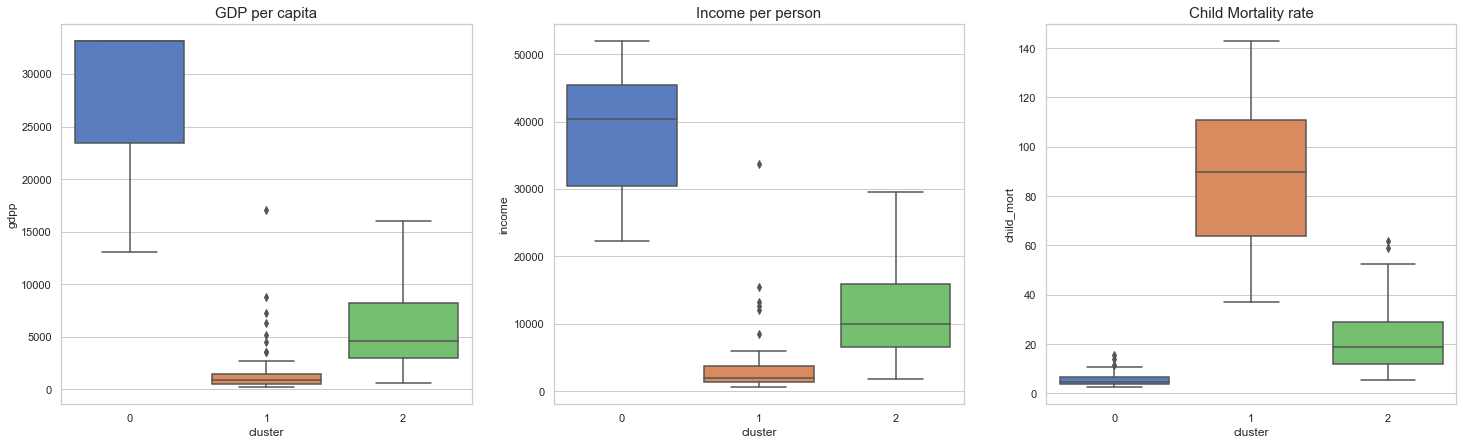

In [51]:
# Box-plot:

f, axes = plt.subplots(1, 3, figsize=(25,7))
sns.boxplot(x='cluster',y='gdpp',data=data,ax=axes[0])
axes[0].set_title('GDP per capita',fontsize=15)
sns.boxplot(x='cluster',y='income',data=data,ax=axes[1])
axes[1].set_title('Income per person',fontsize=15)
sns.boxplot(x='cluster',y='child_mort',data=data,ax=axes[2])
axes[2].set_title('Child Mortality rate',fontsize=15)
plt.show()

## **Findings**

- Countries with low gdpp,income and high child mortality are Under-developed countries (cluster_K = 2)
- Countries with low gdpp,income and low child mortality are Developing countries (cluster_K = 1)
- Countries with high gdpp,income and low child mortality are Developed countries (cluster_K = 0)

## The list of countries which need help on top priority

In [53]:
print('Based on Hierarchial clustering, the countries which need help on top priority are:')
data.loc[data['hier_clus']==0]['country'].to_list()

Based on Hierarchial clustering, the countries which need help on top priority are:


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Gabon',
 'Georgia',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Lao',
 'Latvia',
 'Lebanon',
 'Lithuania',
 'Macedonia, FYR',
 'Madagascar',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Pakistan',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Serbia',
 'Seychelles',
 'Slovak Republic',
 'Slovenia'

### Extracting top 5 countries which have low income, gdpp and high child mortality

In [60]:
top5_Kmeans = data[data['cluster'] ==2].sort_values(by = ['income', 'gdpp', 'child_mort'], ascending = [True, True, False]).head(5)
top5_Kmeans.reset_index(drop=True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,hier_clus
0,Solomon Islands,28.1,49.30,8.55,81.2,1780.0,6.81,61.7,4.24,1290.0,2,0
1,Nepal,47.0,9.58,5.25,36.4,1990.0,15.10,68.3,2.61,592.0,2,0
2,Tajikistan,52.4,14.90,5.98,58.6,2110.0,12.50,69.6,3.51,738.0,2,0
3,Bangladesh,49.4,16.00,3.52,21.8,2440.0,7.14,70.4,2.33,758.0,2,0
4,Cambodia,44.4,54.10,5.68,59.5,2520.0,3.12,66.1,2.88,786.0,2,0


 **Conclusion**
- We used both K Means and heirarchial clustering to understand which countries need fund/assistance for development
- Based on Hierarchial clustering,countries in the cluster 0 need prior attention.
- Based on K Means clustering,countries in the cluster 2 need prior attention.

In [ ]:
#Submitted by DSA Batch03 group 12

